In [1]:
import sys
import xarray as xr
import glob, os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
    outdir = '/glade/p/work/manab/SHARP/PNW_route/output/'
    retrofile = '/glade/p/work/manab/SHARP/PNW_route/output/retro_routed.nc'
    spinupfile = '/glade/p/work/manab/SHARP/PNW_route/output/spinup_routed.nc'
    finalfile = 'retrospinup.nc'
    sid = 17003601
    timeslice = slice(1920,None)

    # Concat retro and spinup simulations
    #simlist = [retrofile,spinupfile]
    #alldat = xr.open_mfdataset(simlist, concat_dim='time')
    retro = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/retro_routed.nc').set_index(sSeg = 'reachID')
    spinup = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/spinup_routed.nc').set_index(sSeg = 'reachID')

    # Import forecast ensemble simulations
    forecastlist = glob.glob((outdir+'*{}*.nc').format('forecast'))   # Find all forecast files
    forecastlist = [x for x in forecastlist if "state" not in x] # Remove start files

    #for x in range(0, len(forecastlist)):
    #    ffile = os.path.splitext(os.path.basename(forecastlist[x]))[0]   #Get names of the forecast files
    #    ffile = xr.open_dataset(forecastlist[x])

    f0 = xr.open_dataset(forecastlist[0]).set_index(sSeg = 'reachID')
    f1 = xr.open_dataset(forecastlist[1]).set_index(sSeg = 'reachID')
    f2 = xr.open_dataset(forecastlist[2]).set_index(sSeg = 'reachID')
    f3 = xr.open_dataset(forecastlist[3]).set_index(sSeg = 'reachID')
    f4 = xr.open_dataset(forecastlist[4]).set_index(sSeg = 'reachID')
    f5 = xr.open_dataset(forecastlist[5]).set_index(sSeg = 'reachID')
    f6 = xr.open_dataset(forecastlist[6]).set_index(sSeg = 'reachID')
    f7 = xr.open_dataset(forecastlist[7]).set_index(sSeg = 'reachID')
    f8 = xr.open_dataset(forecastlist[8]).set_index(sSeg = 'reachID')
    f9 = xr.open_dataset(forecastlist[9]).set_index(sSeg = 'reachID')
    f10 = xr.open_dataset(forecastlist[10]).set_index(sSeg = 'reachID')
    f11 = xr.open_dataset(forecastlist[11]).set_index(sSeg = 'reachID')

In [3]:
f11


<xarray.Dataset>
Dimensions:            (sSeg: 6386, sUps: 324772, time: 56)
Coordinates:
  * time               (time) datetime64[ns] 2017-11-27 2017-11-27T03:00:00 ...
  * sSeg               (sSeg) int64 17906892 17906893 17906894 17906895 ...
Dimensions without coordinates: sUps
Data variables:
    reachOrder         (sSeg) int32 ...
    reachList          (sUps) int32 ...
    listStart          (sSeg) int32 ...
    listCount          (sSeg) int32 ...
    basinArea          (sSeg) float64 ...
    upstreamArea       (sSeg) float64 ...
    instBasinRunoff    (time, sSeg) float64 ...
    dlayBasinRunoff    (time, sSeg) float64 ...
    sumUpstreamRunoff  (time, sSeg) float64 ...
    KWTroutedRunoff    (time, sSeg) float64 ...
    UpBasRoutedRunoff  (time, sSeg) float64 ...
    IRFroutedRunoff    (time, sSeg) float64 ...

In [4]:
    o = pd.read_csv('/glade/p/work/manab/SHARP/data/dly/obsflow.dly.HHDW1.csv')
    o['cfs']=o['cfs']*0.028316847
    o=o.set_index(['Year'])
    date = pd.date_range('1900-01-01', periods=42807, freq='D')
    obs = o.to_xarray()
    obs['Year']=date

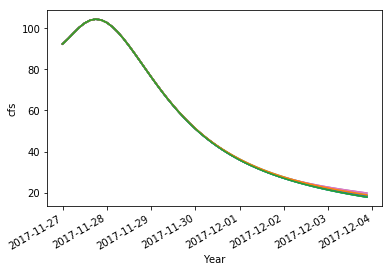

In [7]:
f1.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f2.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f3.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f4.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f5.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f6.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f7.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f8.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f9.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f10.sel(sSeg = sid)['KWTroutedRunoff'].plot()
f11.sel(sSeg = sid)['KWTroutedRunoff'].plot()
(obs['cfs'].loc['2017-11-27':'2017-12-03']).plot()
plt.show()